In [1]:
import numpy as np
from matplotlib import pyplot as plt
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import ts2xy
from stable_baselines3.common.monitor import load_results
from stable_baselines3 import A2C
%load_ext autoreload
%autoreload 2

In [2]:
# results_plotter.plot_results('saved_models', 1e5, results_plotter.X_TIMESTEPS, "Havelsan")

In [3]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

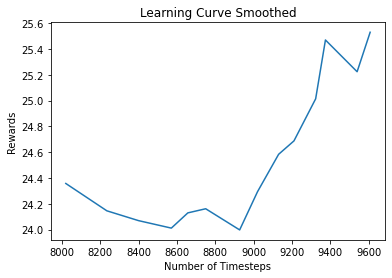

In [5]:
folder = "output/"
plot_results(folder + 'model_outputs_easy')

ValueError: x and y must have same first dimension, but have shapes (9,) and (42,)

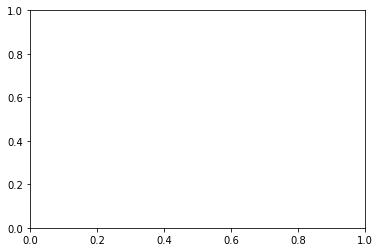

In [6]:
plot_results(folder + 'model_outputs_medium')

ValueError: x and y must have same first dimension, but have shapes (14,) and (37,)

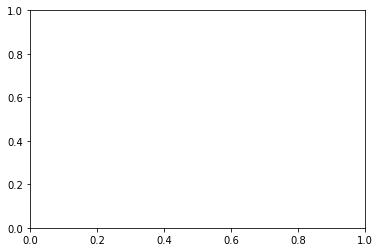

In [7]:
plot_results(folder + 'model_outputs_target')

In [45]:
from train import *

In [46]:
gen_map_list = generate_maps(seed=7, N_maps=10)

easy_map_list = curriculum_design(gen_map_list, level = "easy")
medium_map_list = curriculum_design(gen_map_list, level = "medium")

In [50]:
ind = 5
print(np.sum(gen_map_list[ind] == 1))
print(np.sum(easy_map_list[ind] == 1))
print(np.sum(medium_map_list[ind] == 1))

30
3
15


In [44]:
easy_map_list

[array([[0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [2, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [2, 2, 0, 0, 0, 2, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [61]:
from point_mass_env import AgentFormation, Agent
agent_locations = [1,1]

In [62]:
agent = [[Agent(agent_locations)] for i in range(5)]

In [64]:
agent[4][1]

IndexError: list index out of range